In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import networkx as nx
import math
import powerlaw

import matplotlib.pyplot as plt
import seaborn as sns
import operator

# Graph Basics

In [2]:
# Create Directionless Graph
G = nx.Graph()
# Create Directed Graph
G = nx.DiGraph()

In [3]:
#Add nodes - individual
G.add_node(1)
#Add nodes - multiple from a list
G.add_nodes_from([2,3])

In [4]:
#Add edges - individual
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) # *unpacks the tuple 
#Add edges - multiple from a list
G.add_edges_from([(2,3),(1,2)])

In [5]:
#Display nodes
G.nodes(data=True)

NodeDataView({1: {}, 2: {}, 3: {}})

In [6]:
#Display edges
G.edges()

OutEdgeView([(1, 2), (2, 3)])

# Network Analysis of Trade Data - Inter-state

In [6]:
df = pd.read_excel('D:\Indian School of Business\Shekhar Tomar - Work_Sai\Shipments\Results\Pairwise_state_weight_cn.xlsx',index_col=0)
df = df.fillna(0)
df

,Andaman & Nicobar,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman & Diu,Delhi,...,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
origin_state,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Andhra Pradesh,0,47592.56875,0.00000,4596.58132,0.00000,0.00000,959.69250,0.00000,0.00000,587.60990,...,0.00000,45.00000,2267.33320,0.00000,2536.99324,14356.91681,0.00000,235.35749,0.00000,2350.05643
Arunachal Pradesh,0,0.00000,62.82000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Assam,0,2782.44837,205.08000,60163.42620,1026.39400,71.35399,646.55000,0.00000,0.00000,433.07172,...,0.00000,476.60613,37.65863,206.48806,6603.59500,2406.99500,85.16000,1137.63802,0.00000,2054.76259
Bihar,0,0.00000,0.00000,1700.49479,43683.64600,54.99999,190.38389,0.00000,0.00000,2278.55890,...,0.00000,6023.23903,0.00000,0.00000,354.08510,1420.35909,191.81026,4098.81805,0.00000,11624.88090
Chandigarh,0,668.26146,0.00000,1253.49075,1139.67058,96.02422,1141.38465,0.00000,0.00000,752.24245,...,0.00000,4019.35696,6236.90921,0.00000,763.79517,1072.00143,701.91100,7355.33223,634.18766,6994.23186
Chhattisgarh,0,0.00000,0.00000,0.00000,0.00000,0.00000,8575.24567,0.00000,0.00000,292.00530,...,0.00000,0.00000,0.00000,0.00000,247.09000,67.30867,0.00000,801.27104,534.09200,15.20000
Dadra and Nagar Haveli,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.42571,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Daman & Diu,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


- The index refers to the origin state. 
- Columns refer to the destination state. 
- Cell values refer to weight (kgs) traded. 

In [7]:
# Function to calculate HRI Index. 
def HRI_mat(df):
    HRI_df = pd.DataFrame(columns=df.columns,index=df.index)
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            HRI_df.iloc[i][j] = math.sqrt((df.iloc[i][j]*df.iloc[j][i])/(df.iloc[i][i]*df.iloc[j][j]))
    
    HRI_df = HRI_df[HRI_df.columns].astype(float)
    HRI_df = HRI_df.round(2)
    return HRI_df

In [8]:
HRI_df = HRI_mat(df)
HRI_df

<ipython-input-7-5df3b86ebab3>:6: RuntimeWarning: invalid value encountered in double_scalars
  HRI_df.iloc[i][j] = math.sqrt((df.iloc[i][j]*df.iloc[j][i])/(df.iloc[i][i]*df.iloc[j][j]))
<ipython-input-7-5df3b86ebab3>:6: RuntimeWarning: divide by zero encountered in double_scalars
  HRI_df.iloc[i][j] = math.sqrt((df.iloc[i][j]*df.iloc[j][i])/(df.iloc[i][i]*df.iloc[j][j]))


,Andaman & Nicobar,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman & Diu,Delhi,...,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
origin_state,,,,,,,,,,,,,,,,,,,,,
Andaman & Nicobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andhra Pradesh,NaN,1.00,0.0,0.07,0.00,0.00,0.00,0.0,NaN,0.09,...,NaN,0.02,0.06,0.0,0.10,0.45,0.00,0.02,0.00,0.05
Arunachal Pradesh,NaN,0.00,1.0,0.00,0.00,0.00,0.00,0.0,NaN,0.00,...,NaN,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Assam,NaN,0.07,0.0,1.00,0.03,0.12,0.00,0.0,NaN,0.08,...,NaN,0.06,0.01,0.0,0.11,0.05,0.00,0.04,0.00,0.13
Bihar,NaN,0.00,0.0,0.03,1.00,0.12,0.00,0.0,NaN,0.28,...,NaN,0.21,0.00,0.0,0.03,0.10,0.00,0.11,0.00,0.42
Chandigarh,NaN,0.00,0.0,0.12,0.12,1.00,0.00,0.0,NaN,1.11,...,NaN,1.46,1.25,0.0,0.45,1.24,0.00,1.61,1.92,1.08
Chhattisgarh,NaN,0.00,0.0,0.00,0.00,0.00,1.00,0.0,NaN,0.14,...,NaN,0.00,0.00,0.0,0.02,0.03,0.00,0.06,0.00,0.01
Dadra and Nagar Haveli,NaN,0.00,0.0,0.00,0.00,0.00,0.00,1.0,NaN,0.00,...,NaN,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
Daman & Diu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
HRI_df.columns

Index(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Orissa',
       'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [11]:
cols = ['Rajasthan','Chandigarh','Punjab','Himachal Pradesh','Haryana','Delhi','Uttar Pradesh','Uttarakhand',
        'Maharashtra','Dadra and Nagar Haveli','Gujarat','Daman & Diu','Goa',
        'Pondicherry','Tamil Nadu','Karnataka','Kerala','Telangana','Andhra Pradesh',
        'Orissa','Chhattisgarh','Madhya Pradesh','Bihar',
        'Jharkhand','West Bengal','Sikkim',
        'Nagaland','Mizoram','Assam','Meghalaya','Arunachal Pradesh','Tripura','Manipur',
        'Jammu & Kashmir','Andaman & Nicobar']

len(cols)

35

In [12]:
HRI_df = HRI_df[cols]
HRI_df = HRI_df.reindex(index = cols)

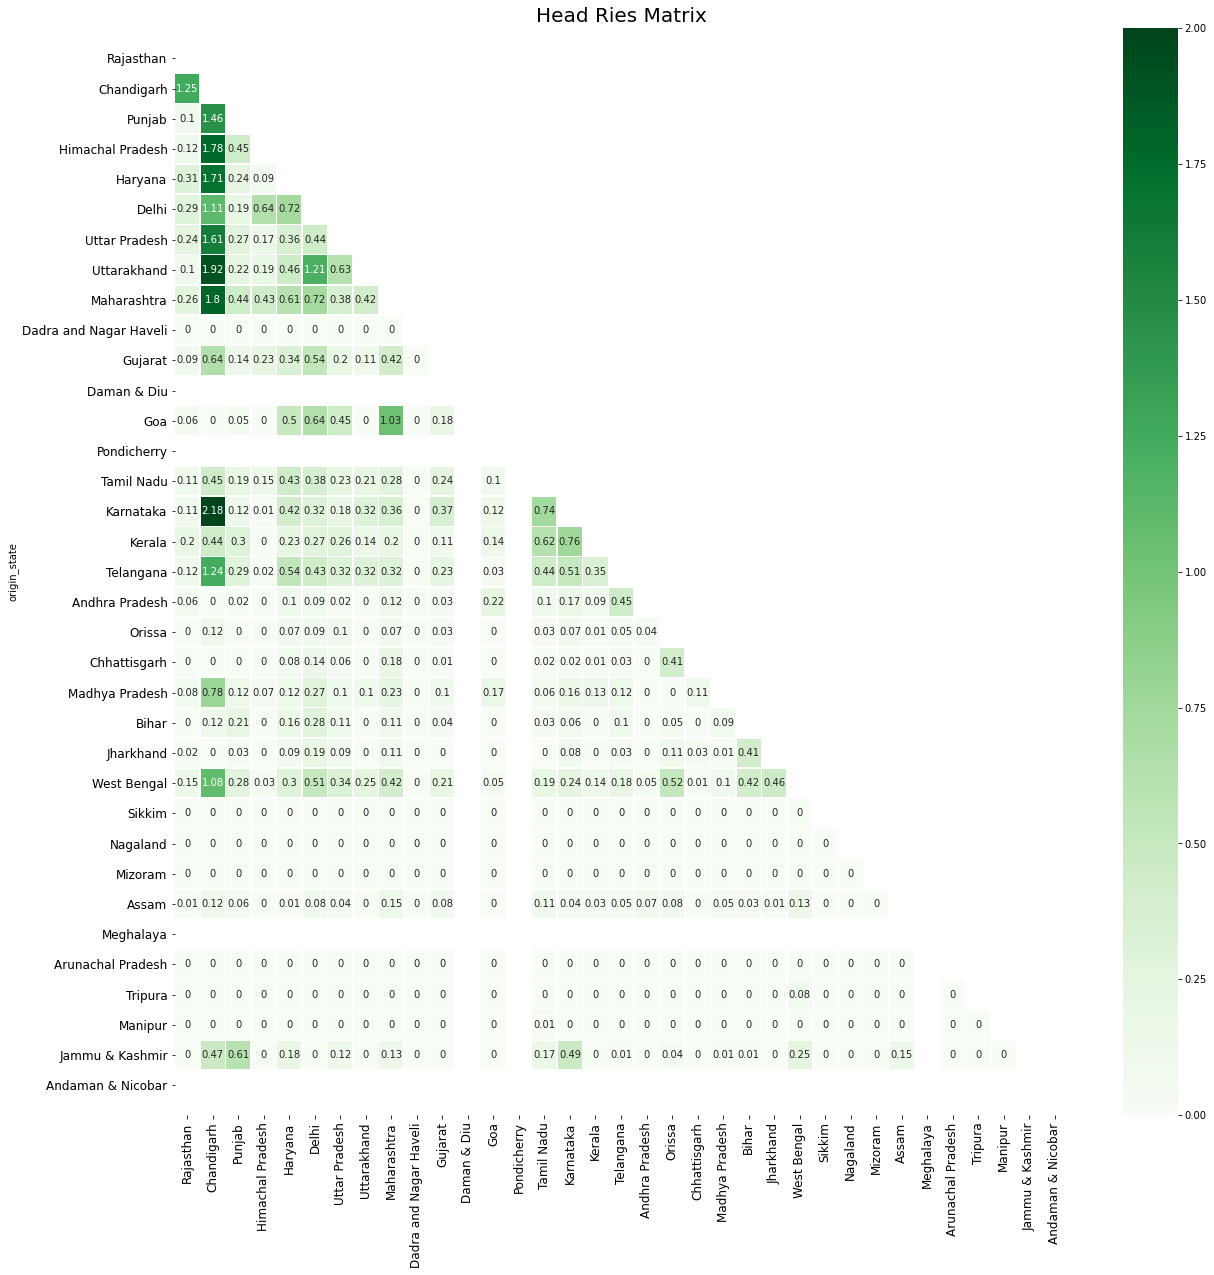

In [13]:
#Plot the head ries Matrix
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
mask = np.triu(np.ones_like(HRI_df, dtype=np.bool))
sns.heatmap(HRI_df, 
            annot=True, 
            mask= mask,
            fmt='.9g',annot_kws={"size":10},
            linewidths=.5,
            cmap = "Greens",
           vmax=2)
sns.color_palette("Blues")
    # Following is needed to increase axis limits. 
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
ax.tick_params(axis='both', which='major', labelsize=12)
plt.title('Head Ries Matrix', fontsize=20)
plt.savefig('Head_Ries.png')

In [14]:
# Create a Directed Network Graph using trade data
G = nx.DiGraph()
#Each origin/destination is a node in the network.
G.add_nodes_from(list(set(df.columns) | set(df.index)))

# Add weighted edges between states that trade
for col in df.columns.to_list():
    destination = col
    for idx in df.index.to_list():
        origin = idx
        weight_shipped = df[col][idx]
        if weight_shipped==0:
            continue
        
        G.add_edge(origin,destination,weight=weight_shipped)

In [15]:
labels = {}    
for node in G.nodes():
    if node in ['Andaman & Nicobar','Sikkim','Daman & Diu','Arunachal Pradesh','Meghalaya','Nagaland','Mizoram']:
        #set the node name as the key and the label as its value 
        labels[node] = node
labels

{'Meghalaya': 'Meghalaya',
 'Mizoram': 'Mizoram',
 'Sikkim': 'Sikkim',
 'Andaman & Nicobar': 'Andaman & Nicobar',
 'Arunachal Pradesh': 'Arunachal Pradesh',
 'Nagaland': 'Nagaland',
 'Daman & Diu': 'Daman & Diu'}

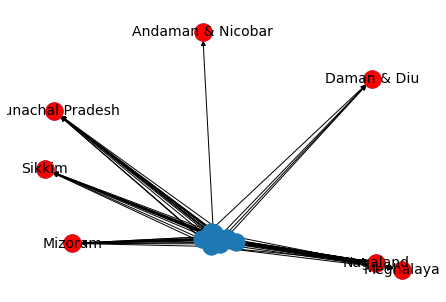

In [16]:
#Assign position layout for the Network
pos=nx.spring_layout(G)

#Draw the network
nx.draw(G,with_labels = False,pos=pos)
nx.draw_networkx_labels(G,pos,labels,font_size=14,font_color='k') # Print certain labels on the Network
nx.draw_networkx_nodes(G, pos, 
                       nodelist=['Andaman & Nicobar','Sikkim','Daman & Diu','Arunachal Pradesh','Meghalaya','Nagaland','Mizoram'], 
                       node_color='r', alpha=1)  #Draw certain nodes in other color

## To print edge attributes in the graph
#labels1 = nx.get_edge_attributes(G,'weight')  
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels1)

In [17]:
# Degree Centrality -- to find out which nodes are better connected!
degree_cent = {}
dict1 = nx.degree_centrality(G)
sorted_keys = sorted(dict1, key=dict1.get)

for w in sorted_keys:
    degree_cent[w] = dict1[w]
    
degree_cent

{'Andaman & Nicobar': 0.029411764705882353,
 'Daman & Diu': 0.11764705882352941,
 'Dadra and Nagar Haveli': 0.23529411764705882,
 'Sikkim': 0.4117647058823529,
 'Pondicherry': 0.4117647058823529,
 'Arunachal Pradesh': 0.4117647058823529,
 'Meghalaya': 0.47058823529411764,
 'Mizoram': 0.47058823529411764,
 'Nagaland': 0.5,
 'Manipur': 0.5294117647058824,
 'Tripura': 0.6176470588235294,
 'Himachal Pradesh': 0.9705882352941176,
 'Chhattisgarh': 1.0294117647058822,
 'Jammu & Kashmir': 1.0294117647058822,
 'Goa': 1.0294117647058822,
 'Jharkhand': 1.1176470588235294,
 'Andhra Pradesh': 1.1470588235294117,
 'Bihar': 1.2058823529411764,
 'Orissa': 1.2941176470588236,
 'Uttarakhand': 1.2941176470588236,
 'Kerala': 1.3235294117647058,
 'Chandigarh': 1.4117647058823528,
 'Assam': 1.4705882352941175,
 'Madhya Pradesh': 1.5294117647058822,
 'Punjab': 1.5588235294117647,
 'Rajasthan': 1.5588235294117647,
 'Delhi': 1.6176470588235294,
 'Gujarat': 1.6176470588235294,
 'Karnataka': 1.6470588235294117,


In [18]:
print('No. of edges: {}'.format(G.number_of_edges()))
print('No. of nodes: {}'.format(G.number_of_nodes()))

No. of edges: 650
No. of nodes: 35


In [19]:
density = nx.density(G)

In [20]:
#Degree of each node as a dictionary.
degree = G.degree()
# Weighted Degree of each node as a dictionary.
weighted_degree = G.degree(weight='weight')

degree_list = []
nodes = []
for (n,d) in degree:
    degree_list.append(d)
    nodes.append(n)
av_degree = sum(degree_list) / len(degree_list)

weighted_degree_list = []
nodes = []
for (n,d) in weighted_degree:
    weighted_degree_list.append(d)
    nodes.append(d)
av_weighted_degree = sum(weighted_degree_list) / len(weighted_degree_list)

In [21]:
#In-Degree of each node as a dictionary
indegree = G.in_degree()
#Weighted In-Degree of each node as a dictionary
weighted_indegree = G.in_degree(weight='weight')

indegree_list = []
node_name = []
for (n,d) in indegree:
    indegree_list.append(d)
    node_name.append(n)
av_indegree = sum(indegree_list) / len(indegree_list)


weighted_indegree_list = []
node_name_weight = []
for (n,d) in weighted_indegree:
    weighted_indegree_list.append(d)
    node_name_weight.append(n)
av_weighted_indegree = sum(weighted_indegree_list) / len(weighted_indegree_list)



indegree_dict = {node_name[i]: indegree_list[i] for i in range(len(node_name))}
weighted_indegree_dict = {node_name_weight[i]: weighted_indegree_list[i] for i in range(len(node_name_weight))}


#Out-Degree of each node as a dictionary
outdegree = G.out_degree()
#Weighted Out-Degree of each node as a dictionary
weighted_outdegree = G.out_degree(weight='weight')

outdegree_list = []
node_name = []
for (n,d) in outdegree:
    outdegree_list.append(d)
    node_name.append(n)
av_outdegree = sum(outdegree_list) / len(outdegree_list)
outdegree_dict = {node_name[i]: outdegree_list[i] for i in range(len(node_name))}



weighted_outdegree_list = []
node_name_weight = []
for (n,d) in weighted_outdegree:
    weighted_outdegree_list.append(d)
    node_name_weight.append(n)
av_weighted_outdegree = sum(weighted_outdegree_list) / len(weighted_outdegree_list)
weighted_outdegree_dict = {node_name_weight[i]: weighted_outdegree_list[i] for i in range(len(node_name_weight))}

In [22]:
print('The edge density is: ' + str(density))
print('')
print('The average degree is ' + str(av_degree))
print('The average weighted degree is ' + str(av_weighted_degree))

The edge density is: 0.5462184873949579

The average degree is 37.142857142857146
The average weighted degree is 504774.7448239996


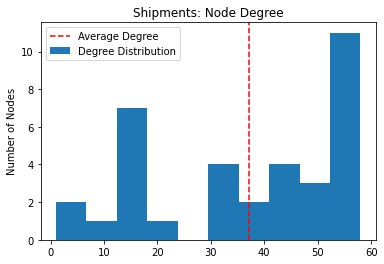

In [96]:
#Distribution of degree
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Shipments: Node Degree')
plt.show()

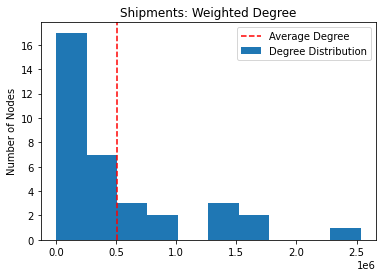

In [97]:
#Distribution of Weighted degree
plt.hist(weighted_degree_list,label='Degree Distribution')
plt.axvline(av_weighted_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Shipments: Weighted Degree')
plt.show()

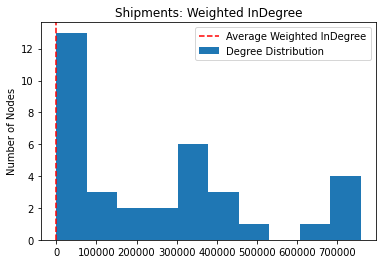

In [98]:
#Distribution of Weighted In-Degree
plt.hist(weighted_indegree_list,label='Degree Distribution')
plt.axvline(av_indegree,color='r',linestyle='dashed',label='Average Weighted InDegree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Shipments: Weighted InDegree')
plt.show()

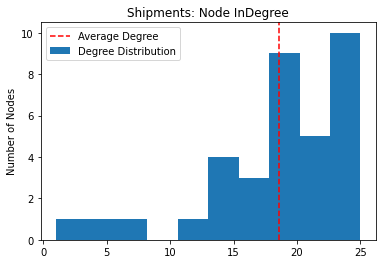

In [99]:
#Distribution of Node In-Degree
plt.hist(indegree_list,label='Degree Distribution')
plt.axvline(av_indegree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Shipments: Node InDegree')
plt.show()

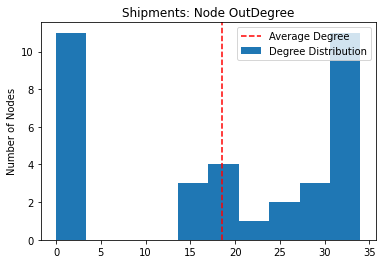

In [100]:
#Distribution of Node Out-Degree
plt.hist(outdegree_list,label='Degree Distribution')
plt.axvline(av_outdegree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Shipments: Node OutDegree')
plt.show()

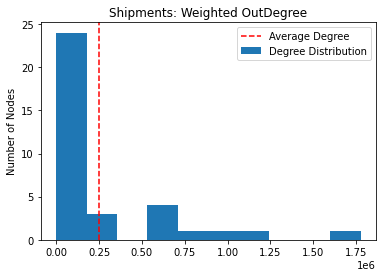

In [101]:
#Distribution of Weighted Out-Degree
plt.hist(weighted_outdegree_list,label='Degree Distribution')
plt.axvline(av_weighted_outdegree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Shipments: Weighted OutDegree')
plt.show()

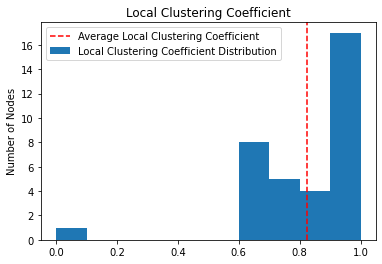

In [102]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(G)

#lets find the average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

#similarly to the degree lets plot the local clustering coefficient distribution
plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()


In [103]:
local_clustering_coefficient

{'Meghalaya': 0.925,
 'Bihar': 0.903448275862069,
 'Mizoram': 1.0,
 'Sikkim': 0.9924242424242424,
 'Tamil Nadu': 0.6696306429548564,
 'Tripura': 0.9735294117647059,
 'Jharkhand': 0.9163961038961039,
 'Kerala': 0.869343891402715,
 'Dadra and Nagar Haveli': 1.0,
 'Pondicherry': 1.0,
 'Andaman & Nicobar': 0,
 'Uttar Pradesh': 0.6691952506596306,
 'Haryana': 0.6634805537244561,
 'Madhya Pradesh': 0.7701579384871156,
 'Andhra Pradesh': 0.9461538461538461,
 'Maharashtra': 0.6634805537244561,
 'Orissa': 0.8293838862559242,
 'Chhattisgarh': 0.9640776699029127,
 'Telangana': 0.6850205198358413,
 'Delhi': 0.7142330383480826,
 'Arunachal Pradesh': 0.9696969696969697,
 'Punjab': 0.7344497607655502,
 'Uttarakhand': 0.817966903073286,
 'Manipur': 0.9957983193277311,
 'Nagaland': 0.9142857142857143,
 'Assam': 0.7515779981965734,
 'West Bengal': 0.6711741424802111,
 'Daman & Diu': 1.0,
 'Jammu & Kashmir': 0.9553398058252427,
 'Goa': 0.9795719844357976,
 'Karnataka': 0.7049005681818182,
 'Himachal Prad

In [104]:
#Weighted centrality - find central nodes by weight
weighted_degree_cent = {}
dict1 = dict(weighted_degree)
dict1 = {k: v / sum(dict1.values()) for k, v in dict1.items()}
sorted_keys = sorted(dict1, key=dict1.get)

for w in sorted_keys:
    weighted_degree_cent[w] = dict1[w]
    
weighted_degree_cent

{'Andaman & Nicobar': 1.075444341111839e-06,
 'Daman & Diu': 2.810456998557556e-06,
 'Dadra and Nagar Haveli': 8.953924986036879e-05,
 'Arunachal Pradesh': 0.00012747449901979798,
 'Sikkim': 0.0006431836976517982,
 'Meghalaya': 0.000854800147978627,
 'Manipur': 0.001155931179736733,
 'Pondicherry': 0.0011924053019131608,
 'Nagaland': 0.001591566617349237,
 'Mizoram': 0.0016075799937768122,
 'Tripura': 0.002405915533377193,
 'Goa': 0.004501525773652866,
 'Himachal Pradesh': 0.004547335349298752,
 'Jammu & Kashmir': 0.006587009944155564,
 'Chandigarh': 0.008523576440729597,
 'Chhattisgarh': 0.010073101538845832,
 'Uttarakhand': 0.012075697350869765,
 'Jharkhand': 0.01508350205272057,
 'Andhra Pradesh': 0.023180692881862655,
 'Orissa': 0.024309752924388854,
 'Assam': 0.02443883495798815,
 'Madhya Pradesh': 0.025550559335836144,
 'Kerala': 0.025736975539090025,
 'Bihar': 0.026711913799125638,
 'Punjab': 0.03028943179265226,
 'Rajasthan': 0.037147783809352235,
 'Telangana': 0.03733534017096

# Network Graph at location level:

In [29]:
df = pd.read_excel('D:\Indian School of Business\Shekhar Tomar - Work_Sai\Shipments\Results\Pairwise_loc_weight_cn.xlsx',index_col=0)
df = df.fillna(0)
df

,Aambasa_Natunply_D (Tripura),Abhanpur_Gatapr_D (Chhattisgarh),Abohar_DC (Punjab),AbuRoad_Tartoli_D (Rajasthan),Achampet_LKComplex_DPP (Telangana),Achrol_BgwriDPP_D (Rajasthan),Adampur_Gzipur_D (Punjab),Adaspur_Uradha_DPP (Orissa),Addanki_Oilmilrd_D (Andhra Pradesh),Adilabad_Vidyanagar_D (Telangana),...,Yavatmal_JajuDPP_D (Maharashtra),Yellamanchili_MannaChrch_DPP (Andhra Pradesh),Yellandu_Sudimala_D (Telangana),Yellare_SH1_DPP (Karnataka),Yemignur_Gndhingr_D (Andhra Pradesh),Zahirabad_Mohim_D (Telangana),Zira_JohalMarket_DPP (Punjab),Zirakpur_AdarshNgr_D (Punjab),cuttack (Orissa),shimla (Himachal Pradesh)
origin,,,,,,,,,,,,,,,,,,,,,
Aambasa_Natunply_D (Tripura),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Abhanpur_Gatapr_D (Chhattisgarh),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Abohar_DC (Punjab),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
AbuRoad_Tartoli_D (Rajasthan),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Achampet_LKComplex_DPP (Telangana),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zahirabad_Mohim_D (Telangana),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Zira_JohalMarket_DPP (Punjab),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Zirakpur_AdarshNgr_D (Punjab),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0


- Index is the origin centre
- Column is the destination centre
- Cell value is the weight (kg) traded

In [30]:
#tot = set(set(df.columns) | set(df.index))
#nullrows = tot - set(df.index)
#nullcols = tot-set(df.columns)

#for loc in nullcols:
    #df[loc] = 0
    
#for loc in nullrows:
    #df.loc[loc] = [0]*len(tot)
    
##df = df.sort_index()
#df = df.reindex(sorted(df.columns), axis=1)
#df.to_excel('D:\Indian School of Business\Shekhar Tomar - Work_Sai\Shipments\Results\Pairwise_loc_weight_cn.xlsx')

In [31]:
#Create a directed graph
G = nx.DiGraph()
# Create a node from each destination/origin
G.add_nodes_from(list(set(df.columns) | set(df.index)))
# Created Weighted Edges
for col in df.columns.to_list():
    destination = col
    for idx in df.index.to_list():
        origin = idx
        weight_shipped = df[col][idx]
        if weight_shipped==0:
            continue
        
        G.add_edge(origin,destination,weight=weight_shipped)

KeyboardInterrupt: 

In [ ]:
#In-Degree of each node as a dictionary
indegree = G.in_degree()
#Weighted In-Degree of each node as a dictionary
weighted_indegree = G.in_degree(weight='weight')

indegree_list = []
node_name = []
for (n,d) in indegree:
    indegree_list.append(d)
    node_name.append(n)
av_indegree = sum(indegree_list) / len(indegree_list)


weighted_indegree_list = []
node_name_weight = []
for (n,d) in weighted_indegree:
    weighted_indegree_list.append(d)
    node_name_weight.append(n)
    
av_weighted_indegree = sum(weighted_indegree_list) / len(weighted_indegree_list)

In [ ]:
indegree_dict = {node_name[i]: indegree_list[i] for i in range(len(node_name))}
weighted_indegree_dict = {node_name_weight[i]: weighted_indegree_list[i] for i in range(len(node_name_weight))}

In [ ]:
#df2 = pd.read_csv('b2b_wbn_path_tonnage_proc.csv')
#df_path = df2.dropna(subset=['path']).reset_index()
#df2['origin'] = df2.apply(lambda x: np.nan if isinstance(x['path'], float) else x['path'].split(',')[0][1:].rstrip(']'),axis=1)
#df_path['destination_state'] = df_path.apply(lambda x: x['path'].split(',')[-1][1:-1].split('(')[1][:-1] if x['cn'] == 'NSZ' else  x['cn'].split('(')[1][:-1],axis=1)

In [ ]:
#Out-Degree of each node as a dictionary
outdegree = G.out_degree()
#Weighted Out-Degree of each node as a dictionary
weighted_outdegree = G.out_degree(weight='weight')

outdegree_list = []
node_name = []
for (n,d) in outdegree:
    outdegree_list.append(d)
    node_name.append(n)
av_outdegree = sum(outdegree_list) / len(outdegree_list)

weighted_outdegree_list = []
node_name_weight = []

for (n,d) in weighted_outdegree:
    weighted_outdegree_list.append(d)
    node_name_weight.append(n)
av_weighted_outdegree = sum(weighted_outdegree_list) / len(weighted_outdegree_list)

In [ ]:
outdegree_dict = {node_name[i]: outdegree_list[i] for i in range(len(node_name))}
weighted_outdegree_dict = {node_name_weight[i]: weighted_outdegree_list[i] for i in range(len(node_name_weight))}

### Centrality Measures

In [105]:
#Degree Centrality
dict1 = nx.degree_centrality(G)
degree_cent_sorted = dict( sorted(dict1.items(), key=operator.itemgetter(1),reverse=True))

for x in list(degree_cent_sorted)[0:10]:
    print ("Node: {}, Degree Centrality: {} ".format(x,  degree_cent_sorted[x]))

Node: Uttar Pradesh, Degree Centrality: 1.7058823529411764 
Node: Haryana, Degree Centrality: 1.7058823529411764 
Node: Maharashtra, Degree Centrality: 1.7058823529411764 
Node: West Bengal, Degree Centrality: 1.7058823529411764 
Node: Tamil Nadu, Degree Centrality: 1.6764705882352942 
Node: Telangana, Degree Centrality: 1.6764705882352942 
Node: Karnataka, Degree Centrality: 1.6470588235294117 
Node: Delhi, Degree Centrality: 1.6176470588235294 
Node: Gujarat, Degree Centrality: 1.6176470588235294 
Node: Punjab, Degree Centrality: 1.5588235294117647 


In [106]:
in_deg_centrality = nx.in_degree_centrality(G)
in_deg_centrality_sorted = dict( sorted(in_deg_centrality.items(), key=operator.itemgetter(1),reverse=True))

for x in list(in_deg_centrality_sorted)[0:10]:
    print ("Node: {}, In-Degree Centrality: {} ".format(x,  in_deg_centrality_sorted[x]))

Node: Uttar Pradesh, In-Degree Centrality: 0.7352941176470588 
Node: West Bengal, In-Degree Centrality: 0.7352941176470588 
Node: Karnataka, In-Degree Centrality: 0.7352941176470588 
Node: Tamil Nadu, In-Degree Centrality: 0.7058823529411764 
Node: Haryana, In-Degree Centrality: 0.7058823529411764 
Node: Maharashtra, In-Degree Centrality: 0.7058823529411764 
Node: Telangana, In-Degree Centrality: 0.7058823529411764 
Node: Madhya Pradesh, In-Degree Centrality: 0.6764705882352942 
Node: Delhi, In-Degree Centrality: 0.6764705882352942 
Node: Gujarat, In-Degree Centrality: 0.6764705882352942 


In [107]:
out_deg_centrality = nx.out_degree_centrality(G)

out_deg_centrality_sorted = dict( sorted(out_deg_centrality.items(), key=operator.itemgetter(1),reverse=True))

for x in list(out_deg_centrality_sorted)[0:10]:
    print ("Node: {}, Out-Degree Centrality: {} ".format(x,  out_deg_centrality_sorted[x]))

Node: Haryana, Out-Degree Centrality: 1.0 
Node: Maharashtra, Out-Degree Centrality: 1.0 
Node: Tamil Nadu, Out-Degree Centrality: 0.9705882352941176 
Node: Uttar Pradesh, Out-Degree Centrality: 0.9705882352941176 
Node: Telangana, Out-Degree Centrality: 0.9705882352941176 
Node: West Bengal, Out-Degree Centrality: 0.9705882352941176 
Node: Rajasthan, Out-Degree Centrality: 0.9705882352941176 
Node: Delhi, Out-Degree Centrality: 0.9411764705882353 
Node: Gujarat, Out-Degree Centrality: 0.9411764705882353 
Node: Punjab, Out-Degree Centrality: 0.9117647058823529 


In [108]:
#Weighted Degree Centrality
weighted_degree_cent = {}
dict1 = dict(weighted_degree)
dict1 = {k: v / sum(dict1.values()) for k, v in dict1.items()}
sorted_keys = sorted(dict1, key=dict1.get, reverse=True)

for w in sorted_keys:
    weighted_degree_cent[w] = dict1[w]

for x in list(weighted_degree_cent)[:10]:
    print ("Node: {}, Weighted Degree Centrality: {} ".format(x,  weighted_degree_cent[x]))

Node: Maharashtra, Weighted Degree Centrality: 0.14340492128924603 
Node: Haryana, Weighted Degree Centrality: 0.09768469170663704 
Node: West Bengal, Weighted Degree Centrality: 0.09030737627653761 
Node: Karnataka, Weighted Degree Centrality: 0.08358230244631906 
Node: Tamil Nadu, Weighted Degree Centrality: 0.08098367528945212 
Node: Uttar Pradesh, Weighted Degree Centrality: 0.07321518497925024 
Node: Gujarat, Weighted Degree Centrality: 0.05664471488898234 
Node: Delhi, Weighted Degree Centrality: 0.048411817340041845 
Node: Telangana, Weighted Degree Centrality: 0.03733534017096143 
Node: Rajasthan, Weighted Degree Centrality: 0.037147783809352235 


In [111]:
#Weighted InDegree Centrality
weighted_indegree_cent = {}
dict1 = dict(weighted_indegree)
dict1 = {k: v / sum(dict1.values()) for k, v in dict1.items()}
sorted_keys = sorted(dict1, key=dict1.get, reverse=True)

for w in sorted_keys:
    weighted_indegree_cent[w] = dict1[w]

for x in list(weighted_indegree_cent)[:10]:
    print ("Node: {}, Weighted In-Degree Centrality: {} ".format(x,  weighted_indegree_cent[x]))

Node: Uttar Pradesh, Weighted In-Degree Centrality: 0.08577109089539724 
Node: Maharashtra, Weighted In-Degree Centrality: 0.08571271214721805 
Node: Karnataka, Weighted In-Degree Centrality: 0.08246814027161534 
Node: Tamil Nadu, Weighted In-Degree Centrality: 0.08214846287333491 
Node: West Bengal, Weighted In-Degree Centrality: 0.06984746083128075 
Node: Haryana, Weighted In-Degree Centrality: 0.05589449350149909 
Node: Rajasthan, Weighted In-Degree Centrality: 0.04725350826060524 
Node: Telangana, Weighted In-Degree Centrality: 0.04603004922655694 
Node: Bihar, Weighted In-Degree Centrality: 0.04295426816482277 
Node: Gujarat, Weighted In-Degree Centrality: 0.041488774861947623 


In [114]:
#Weighted Degree Centrality
weighted_outdegree_cent = {}
dict1 = dict(weighted_outdegree)
dict1 = {k: v / sum(dict1.values()) for k, v in dict1.items()}
sorted_keys = sorted(dict1, key=dict1.get, reverse=True)

for w in sorted_keys:
    weighted_outdegree_cent[w] = dict1[w]

for x in list(weighted_outdegree_cent)[:10]:
    print ("Node: {}, Weighted Out-Degree Centrality: {} ".format(x,  weighted_outdegree_cent[x]))

Node: Maharashtra, Weighted Out-Degree Centrality: 0.20109713043127403 
Node: Haryana, Weighted Out-Degree Centrality: 0.139474889911775 
Node: West Bengal, Weighted Out-Degree Centrality: 0.11076729172179448 
Node: Karnataka, Weighted Out-Degree Centrality: 0.08469646462102279 
Node: Tamil Nadu, Weighted Out-Degree Centrality: 0.07981888770556934 
Node: Gujarat, Weighted Out-Degree Centrality: 0.07180065491601705 
Node: Delhi, Weighted Out-Degree Centrality: 0.0703560772995823 
Node: Uttar Pradesh, Weighted Out-Degree Centrality: 0.060659279063103234 
Node: Telangana, Weighted Out-Degree Centrality: 0.028640631115365918 
Node: Rajasthan, Weighted Out-Degree Centrality: 0.027042059358099235 


In [118]:
import collections
idcent = collections.OrderedDict(sorted(weighted_indegree_cent.items()))
odcent = collections.OrderedDict(sorted(weighted_outdegree_cent.items()))

In [128]:
z

array([-0.01005486, -0.00554043, -0.00102601,  0.00348842,  0.00800284,
        0.01251727,  0.0170317 ,  0.02154612,  0.02606055,  0.03057497,
        0.0350894 ,  0.03960382,  0.04411825,  0.04863267,  0.0531471 ,
        0.05766152,  0.06217595,  0.06669037,  0.0712048 ,  0.07571923,
        0.08023365,  0.08474808,  0.0892625 ,  0.09377693,  0.09829135,
        0.10280578,  0.1073202 ,  0.11183463,  0.11634905,  0.12086348,
        0.1253779 ,  0.12989233,  0.13440676,  0.13892118,  0.14343561,
        0.14795003,  0.15246446,  0.15697888,  0.16149331,  0.16600773,
        0.17052216,  0.17503658,  0.17955101,  0.18406543,  0.18857986,
        0.19309429,  0.19760871,  0.20212314,  0.20663756,  0.21115199])

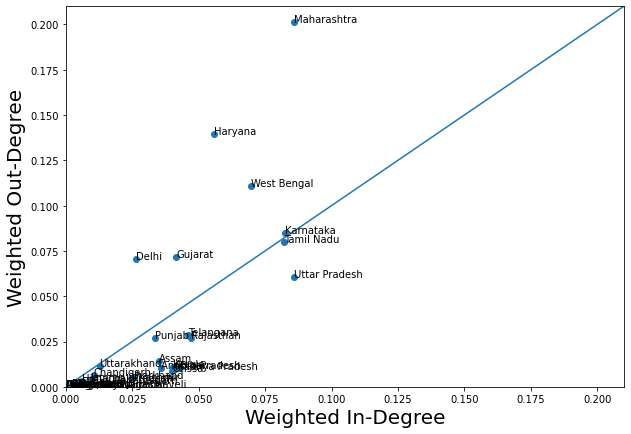

In [134]:
x = list(idcent.values())
y = list(odcent.values())
n = list(odcent.keys())

fig, ax = plt.subplots(figsize=(10,7))         # Sample figsize in inches
ax.ticklabel_format(useOffset=False,style='plain')
ax.scatter(x,y)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

#plt.xlim([0,max(x)+110000])
plt.xlim([0,0.21])
#plt.ylim([0,max(y)+110000])
plt.ylim([0,0.21])
z = np.linspace(*ax.get_ylim())
ax.plot(z, z)

plt.xlabel('Weighted In-Degree',fontsize=20)
plt.ylabel('Weighted Out-Degree',fontsize=20)

plt.show()

In [87]:
#Betweenness Centrality
b=nx.betweenness_centrality(G,weight='weight')
b_dict_sorted = dict( sorted(b.items(), key=operator.itemgetter(1),reverse=True))
for x in list(b_dict_sorted)[0:10]:
    print ("Node: {}, Betweenness Centrality(W): {} ".format(x,  b_dict_sorted[x]))

Node: Bihar, Betweenness Centrality(W): 0.3074866310160428 
Node: Jammu & Kashmir, Betweenness Centrality(W): 0.3012477718360071 
Node: Himachal Pradesh, Betweenness Centrality(W): 0.2620320855614973 
Node: West Bengal, Betweenness Centrality(W): 0.2424242424242424 
Node: Tripura, Betweenness Centrality(W): 0.22281639928698752 
Node: Goa, Betweenness Centrality(W): 0.21301247771836007 
Node: Karnataka, Betweenness Centrality(W): 0.14795008912655971 
Node: Telangana, Betweenness Centrality(W): 0.11497326203208555 
Node: Dadra and Nagar Haveli, Betweenness Centrality(W): 0.1140819964349376 
Node: Orissa, Betweenness Centrality(W): 0.10873440285204991 


In [29]:
close_centrality = nx.closeness_centrality(G)

close_centrality_sorted = dict( sorted(close_centrality.items(), key=operator.itemgetter(1),reverse=True))
for x in list(close_centrality_sorted)[0:10]:
    print ("Node: {}, Closeness Centrality: {} ".format(x,  close_centrality_sorted[x]))

Node: Karnataka, Closeness Centrality: 0.7147058823529412 
Node: West Bengal, Closeness Centrality: 0.7147058823529412 
Node: Uttar Pradesh, Closeness Centrality: 0.7147058823529412 
Node: Telangana, Closeness Centrality: 0.6916508538899431 
Node: Haryana, Closeness Centrality: 0.6916508538899431 
Node: Tamil Nadu, Closeness Centrality: 0.6916508538899431 
Node: Maharashtra, Closeness Centrality: 0.6916508538899431 
Node: Gujarat, Closeness Centrality: 0.6700367647058824 
Node: Delhi, Closeness Centrality: 0.6700367647058824 
Node: Madhya Pradesh, Closeness Centrality: 0.6700367647058824 


In [30]:
pr = nx.pagerank(G, alpha = 0.8)

pr_sorted = dict( sorted(pr.items(), key=operator.itemgetter(1),reverse=True))
for x in list(pr_sorted)[0:10]:
    print ("Node: {}, Page Rank (W): {} ".format(x,  pr_sorted[x]))

Node: Karnataka, Page Rank (W): 0.06024346754651075 
Node: West Bengal, Page Rank (W): 0.05079934645349971 
Node: Tamil Nadu, Page Rank (W): 0.04967028690189326 
Node: Maharashtra, Page Rank (W): 0.049527996722642575 
Node: Mizoram, Page Rank (W): 0.047293069372533414 
Node: Bihar, Page Rank (W): 0.04698674507091554 
Node: Uttar Pradesh, Page Rank (W): 0.0455349416123232 
Node: Madhya Pradesh, Page Rank (W): 0.04070449419852572 
Node: Orissa, Page Rank (W): 0.039322505178092604 
Node: Assam, Page Rank (W): 0.03670714309500354 


In [31]:
eigen_centrality = nx.eigenvector_centrality(G)
eigen_centrality_sorted = dict( sorted(eigen_centrality.items(), key=operator.itemgetter(1),reverse=True))
for x in list(eigen_centrality_sorted)[0:10]:
    print ("Node: {}, Eigen Centrality: {} ".format(x,  eigen_centrality_sorted[x]))

Node: West Bengal, Eigen Centrality: 0.2146375580556265 
Node: Uttar Pradesh, Eigen Centrality: 0.21190874782635344 
Node: Karnataka, Eigen Centrality: 0.20906000469439842 
Node: Telangana, Eigen Centrality: 0.20686250788764463 
Node: Haryana, Eigen Centrality: 0.20686250788764463 
Node: Maharashtra, Eigen Centrality: 0.20686250788764463 
Node: Tamil Nadu, Eigen Centrality: 0.20486504395036506 
Node: Delhi, Eigen Centrality: 0.1991487743143445 
Node: Madhya Pradesh, Eigen Centrality: 0.19801589552758125 
Node: Gujarat, Eigen Centrality: 0.1957180823291324 


In [32]:
eigen_centrality_w = nx.eigenvector_centrality(G,weight='weight')
eigen_centrality_sorted_w = dict( sorted(eigen_centrality_w.items(), key=operator.itemgetter(1),reverse=True))
for x in list(eigen_centrality_sorted_w)[0:10]:
    print ("Node: {}, Eigen Centrality(W): {} ".format(x,  eigen_centrality_sorted_w[x]))

Node: Tamil Nadu, Eigen Centrality(W): 0.386166508715416 
Node: Maharashtra, Eigen Centrality(W): 0.3721311312060507 
Node: Uttar Pradesh, Eigen Centrality(W): 0.37044298219393923 
Node: Karnataka, Eigen Centrality(W): 0.3493184951064585 
Node: West Bengal, Eigen Centrality(W): 0.28759656406261713 
Node: Haryana, Eigen Centrality(W): 0.25100625151363365 
Node: Telangana, Eigen Centrality(W): 0.20284279869095254 
Node: Kerala, Eigen Centrality(W): 0.1891107907732064 
Node: Rajasthan, Eigen Centrality(W): 0.1871546255452255 
Node: Madhya Pradesh, Eigen Centrality(W): 0.16441395022432795 


In [33]:
states = pd.read_csv('states_lot_lon.csv')
states.set_index('State',inplace=True)
states.head(2)

,lat,lon
State,,
West Bengal,23.953616,87.935521
Tamil Nadu,11.015996,78.410170


In [77]:
from mpl_toolkits.basemap import Basemap as Basemap
m = Basemap(
        projection='merc',
        llcrnrlon=67,
        llcrnrlat=7,
        urcrnrlon=98,
        urcrnrlat=37,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)


lats=list(states['lat'])
lons=list(states['lon'])
# convert lat and lon to map projection
mx,my=m(lons,lats)

states['lat_map'] = my
states['lon_map'] = mx

In [78]:
for n in list(G.nodes()):
    pos[n] = (states['lon_map'][n],states['lat_map'][n])


In [81]:
weightss = [] 
for edge in G.edges(data=True):
    weightss.append((edge[2]['weight']))

In [82]:
min(weightss)

2.72

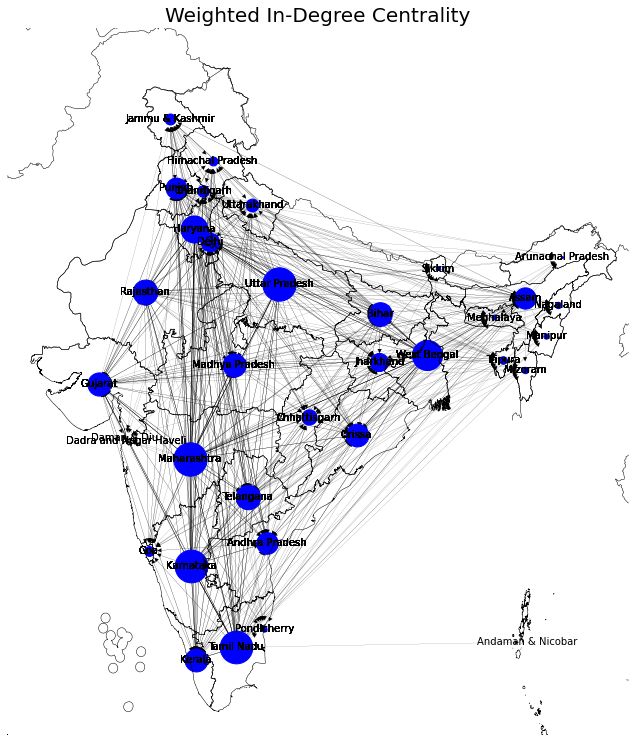

In [96]:
fig, ax = plt.subplots(figsize=(15,13))
labels = {}    

#nx.draw_networkx(G,pos,node_size=200,node_color='blue',with_labels=False)
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, edgelist=[(edge[0],edge[1])],pos = pos,width=0.1+edge[2]['weight']/max(weightss), edge_color='k')
for node in weighted_degree_cent:
    labels[node] = node
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family='sans-serif',font_color='black')
    node_size = weighted_degree_cent[node]*13000
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=node_size,node_color='b', alpha=1)
m.drawcountries()
m.drawstates()
#m.bluemarble()
m.readshapefile('INDIASTATES', 'Indiastates')
india_states.boundary.plot(color='k', ax=ax)
plt.axis("off")
plt.title('Weighted In-Degree Centrality',fontsize =20)
#plt.show()
plt.savefig('InDegree.png',bbox_inches='tight')

## Power Law Distribution
- We will now see a rank-degree distribution at centre level. We will check if this fits Power law distribution

In [ ]:
#Sorted dictionary of indegree and weighted-indegree
indegree_dict_sorted = dict( sorted(indegree_dict.items(), key=operator.itemgetter(1),reverse=True))
weighted_indegree_dict_sorted = dict( sorted(weighted_indegree_dict.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
indegree_dict_sorted_df = pd.DataFrame([list(indegree_dict_sorted.keys()),list(indegree_dict_sorted.values())]).T
indegree_dict_sorted_df = indegree_dict_sorted_df.reset_index()#
indegree_dict_sorted_df.columns = ['Rank_Indegree','Location','Indegree']
indegree_dict_sorted_df['Rank_Indegree'] = indegree_dict_sorted_df['Rank_Indegree']+1/2
indegree_dict_sorted_df.head(3)

In [ ]:
weighted_indegree_dict_sorted_df = pd.DataFrame([list(weighted_indegree_dict_sorted.keys()),list(weighted_indegree_dict_sorted.values())]).T
weighted_indegree_dict_sorted_df = weighted_indegree_dict_sorted_df.reset_index()#
weighted_indegree_dict_sorted_df.columns = ['Rank_Weighted_InDegree','Location','Weighted_Indegree']
weighted_indegree_dict_sorted_df['Rank_Weighted_InDegree'] = weighted_indegree_dict_sorted_df['Rank_Weighted_InDegree']+1/2
weighted_indegree_dict_sorted_df.head(3)

In [ ]:
# Indegree Data with ranks and log-log
indegree_df = weighted_indegree_dict_sorted_df.merge(indegree_dict_sorted_df,on='Location')
indegree_df['Indegree_ln'] = np.log(indegree_df['Indegree'].replace(0, np.nan))
indegree_df['Rank_ln'] = np.log(indegree_df['Rank_Indegree'])

indegree_df['Weighted_Indegree_ln'] = np.log(indegree_df['Weighted_Indegree'].replace(0, np.nan))
indegree_df['Rank_Weight_ln'] = np.log(indegree_df['Rank_Weighted_InDegree'])
indegree_df

In [ ]:
# Printing rank and indegree
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,5))
plt.subplot(2, 1, 1)
plt.scatter(indegree_df['Indegree'],indegree_df['Rank_Indegree'])
plt.axvline(av_indegree,color='r',linestyle='dashed',label='Average inDegree')
plt.legend()
plt.xlabel('Node inDegree')
plt.ylabel('Rank of Location')
plt.title('Shipments: Node In-Degree (location level)')
plt.show()

fig, ax = plt.subplots(figsize=(7,5))
plt.subplot(2, 1, 2)
plt.scatter(indegree_df['Weighted_Indegree'],indegree_df['Rank_Weighted_InDegree'])
plt.axvline(av_weighted_indegree,color='r',linestyle='dashed',label='Average inDegree (Weighted)')
plt.ylabel('Rank')
plt.xlabel('Weighted In-degree')
plt.title('Shipments: Weighted In-Degree (location level)')
plt.legend()
plt.show()

- Looks like a long-tailed distribution. 

In [ ]:
# Printing log-log rank and indegree
fig, ax = plt.subplots(figsize=(5,5))
plt.subplot(2, 1, 1)
plt.scatter(indegree_df['Indegree_ln'],indegree_df['Rank_ln'])
plt.xlabel('Log(Node In-degree)')
plt.ylabel('Log(Rank)')
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
plt.subplot(2, 1, 2)
plt.scatter(indegree_df['Weighted_Indegree_ln'],indegree_df['Rank_Weight_ln'])
plt.xlabel('Ln(Weighted In-degree)')
plt.ylabel('Ln(Rank)')
plt.show()

- Doesn't look like a perfect power-law distribution. We will do statistical analysis anyway

In [ ]:
# Create a similar rank-outdegree dataframe
outdegree_dict_sorted = dict(sorted(outdegree_dict.items(), key=operator.itemgetter(1),reverse=True))
weighted_outdegree_dict_sorted = dict(sorted(weighted_outdegree_dict.items(), key=operator.itemgetter(1),reverse=True))

outdegree_dict_sorted_df = pd.DataFrame([list(outdegree_dict_sorted.keys()),list(outdegree_dict_sorted.values())]).T
outdegree_dict_sorted_df = outdegree_dict_sorted_df.reset_index()#
outdegree_dict_sorted_df.columns = ['Rank_Outdegree','Location','Outdegree']
outdegree_dict_sorted_df['Rank_Outdegree'] = outdegree_dict_sorted_df['Rank_Outdegree']+1/2

weighted_outdegree_dict_sorted_df = pd.DataFrame([list(weighted_outdegree_dict_sorted.keys()),list(weighted_outdegree_dict_sorted.values())]).T
weighted_outdegree_dict_sorted_df = weighted_outdegree_dict_sorted_df.reset_index()#
weighted_outdegree_dict_sorted_df.columns = ['Rank_Weighted_OutDegree','Location','Weighted_Outdegree']
weighted_outdegree_dict_sorted_df['Rank_Weighted_OutDegree'] = weighted_outdegree_dict_sorted_df['Rank_Weighted_OutDegree']+1/2

outdegree_df = weighted_outdegree_dict_sorted_df.merge(outdegree_dict_sorted_df,on='Location')


outdegree_df['Outdegree_ln'] = np.log(outdegree_df['Outdegree'].replace(0, np.nan))
outdegree_df['Rank_ln'] = np.log(outdegree_df['Rank_Outdegree'])

outdegree_df['Weighted_Outdegree_ln'] = np.log(outdegree_df['Weighted_Outdegree'].replace(0, np.nan))
outdegree_df['Rank_Weight_ln'] = np.log(outdegree_df['Rank_Weighted_OutDegree'])

outdegree_df

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
plt.subplot(2, 1, 1)
plt.scatter(outdegree_df['Outdegree'],outdegree_df['Rank_Outdegree'])
plt.axvline(av_outdegree,color='r',linestyle='dashed',label='Average OutDegree')
plt.legend()
plt.xlabel('Node OutDegree')
plt.ylabel('Rank of Location')
plt.title('Shipments: Node Out-Degree (location level)')
plt.show()

fig, ax = plt.subplots(figsize=(7,5))
plt.subplot(2, 1, 2)
plt.scatter(outdegree_df['Weighted_Outdegree'],outdegree_df['Rank_Weighted_OutDegree'])
plt.axvline(av_weighted_outdegree,color='r',linestyle='dashed',label='Average OutDegree (Weighted)')
plt.ylabel('Rank')
plt.xlabel('Weighted Out-degree')
plt.title('Shipments: Weighted Out-Degree (location level)')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
plt.subplot(2, 1, 1)
plt.scatter(outdegree_df['Outdegree_ln'],outdegree_df['Rank_ln'])
plt.xlabel('Ln(Node Out-degree)')
plt.ylabel('Ln(Rank)')
plt.show()

fig, ax = plt.subplots(figsize=(5,5))
plt.subplot(2, 1, 2)
plt.scatter(outdegree_df['Weighted_Outdegree_ln'],outdegree_df['Rank_Weight_ln'])
plt.xlabel('Ln(Weighted Out-degree)')
plt.ylabel('Ln(Rank)')
plt.show()

### Fitting a power law distribution

- First of all, we need to find x_min. There is no perfect fit for power-law. 
- But after a certain cut-off value, we can find a power-law equation that fits the data well. 
- That cut-off value is obtained at the least KS-stat value.

In [ ]:
from scipy import stats
from pylab import figure, text, scatter, show


# Finding least KS Stat value
def powerlaw_xmin(df,ycol,xcol,step=0.1):
    kss = []
    ks = []
    for k in list(np.arange(int(df[xcol].min()),int(df[xcol].max()),step)):
        ks.append(k)
        dflog = df[[ycol,xcol]]
        dflog = dflog[dflog[xcol]>k]
        kss.append(stats.ks_2samp(dflog[ycol],dflog[xcol]))
    ks_df = pd.DataFrame(kss,ks).reset_index()
    #ks_df.plot('index','statistic')
        
    x_min = ks_df.sort_values(by='statistic').reset_index()['index'][0]
    return x_min

def powerlaw_fit(df,ycol,xcol,x_min=0):
    df_min = df[df[xcol]>=x_min]
    from statsmodels.formula.api import ols
    
    model = ols(ycol+'~'+xcol,data=df_min).fit()
    intercept = model.params[0]
    slope = model.params[1]
    se = model.bse
    
    rank_ln_hat = intercept + (slope)*df_min[xcol]
    df_min.insert(loc=1,value=rank_ln_hat,column='Rank_ln_hat')
    
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(df[xcol],df[ycol],color='red',label='original')
    ax.plot(df_min[xcol],df_min['Rank_ln_hat'],color='green',label='fitted')
    plt.axvline(x_min,color='green',linestyle='dashed',label='Cut-off')
    plt.legend()
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    text(0.2, 0.1,'Intercept = '+str(intercept)+'\n Alpha = '+str(slope)+'\n SE = '+str(se[xcol]),
         ha='center', va='center', transform=ax.transAxes)
    plt.title('Power law fit of '+xcol+'-'+ycol)
    plt.show()

In [ ]:
# Indegree
xmin = powerlaw_xmin(indegree_df,xcol='Indegree_ln',ycol='Rank_ln')
powerlaw_fit(indegree_df,xcol='Indegree_ln',ycol='Rank_ln',x_min=xmin)

In [ ]:
# Weighted Indegree
xmin = powerlaw_xmin(indegree_df,xcol='Weighted_Indegree_ln',ycol='Rank_Weight_ln')
powerlaw_fit(indegree_df,xcol='Weighted_Indegree_ln',ycol='Rank_Weight_ln',x_min=xmin)

In [ ]:
# Out-degree
xmin = powerlaw_xmin(outdegree_df,xcol='Outdegree_ln',ycol='Rank_ln')
powerlaw_fit(outdegree_df,xcol='Outdegree_ln',ycol='Rank_ln',x_min=xmin)

In [ ]:
# Weighted Out-degree
xmin = powerlaw_xmin(outdegree_df,xcol='Weighted_Outdegree_ln',ycol='Rank_Weight_ln')
powerlaw_fit(outdegree_df,xcol='Weighted_Outdegree_ln',ycol='Rank_Weight_ln',x_min=xmin)

# Second Order Networks

In [53]:
# Create a Boolean Adjancency Matrix
adj = df>0
adj = adj.astype(int)
adj

,Aambasa_Natunply_D (Tripura),Abhanpur_Gatapr_D (Chhattisgarh),Abohar_DC (Punjab),AbuRoad_Tartoli_D (Rajasthan),Achampet_LKComplex_DPP (Telangana),Achrol_BgwriDPP_D (Rajasthan),Adampur_Gzipur_D (Punjab),Adaspur_Uradha_DPP (Orissa),Addanki_Oilmilrd_D (Andhra Pradesh),Adilabad_Vidyanagar_D (Telangana),...,Yavatmal_JajuDPP_D (Maharashtra),Yellamanchili_MannaChrch_DPP (Andhra Pradesh),Yellandu_Sudimala_D (Telangana),Yellare_SH1_DPP (Karnataka),Yemignur_Gndhingr_D (Andhra Pradesh),Zahirabad_Mohim_D (Telangana),Zira_JohalMarket_DPP (Punjab),Zirakpur_AdarshNgr_D (Punjab),cuttack (Orissa),shimla (Himachal Pradesh)
origin,,,,,,,,,,,,,,,,,,,,,
Aambasa_Natunply_D (Tripura),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abhanpur_Gatapr_D (Chhattisgarh),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abohar_DC (Punjab),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AbuRoad_Tartoli_D (Rajasthan),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Achampet_LKComplex_DPP (Telangana),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zahirabad_Mohim_D (Telangana),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zira_JohalMarket_DPP (Punjab),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zirakpur_AdarshNgr_D (Punjab),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Second Order Adjancency Matrix
adj2 = adj.dot(adj)
adj2 = adj2>0
adj2 = adj2.astype(int)
adj2

,Aambasa_Natunply_D (Tripura),Abhanpur_Gatapr_D (Chhattisgarh),Abohar_DC (Punjab),AbuRoad_Tartoli_D (Rajasthan),Achampet_LKComplex_DPP (Telangana),Achrol_BgwriDPP_D (Rajasthan),Adampur_Gzipur_D (Punjab),Adaspur_Uradha_DPP (Orissa),Addanki_Oilmilrd_D (Andhra Pradesh),Adilabad_Vidyanagar_D (Telangana),...,Yavatmal_JajuDPP_D (Maharashtra),Yellamanchili_MannaChrch_DPP (Andhra Pradesh),Yellandu_Sudimala_D (Telangana),Yellare_SH1_DPP (Karnataka),Yemignur_Gndhingr_D (Andhra Pradesh),Zahirabad_Mohim_D (Telangana),Zira_JohalMarket_DPP (Punjab),Zirakpur_AdarshNgr_D (Punjab),cuttack (Orissa),shimla (Himachal Pradesh)
origin,,,,,,,,,,,,,,,,,,,,,
Aambasa_Natunply_D (Tripura),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abhanpur_Gatapr_D (Chhattisgarh),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abohar_DC (Punjab),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AbuRoad_Tartoli_D (Rajasthan),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Achampet_LKComplex_DPP (Telangana),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zahirabad_Mohim_D (Telangana),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zira_JohalMarket_DPP (Punjab),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zirakpur_AdarshNgr_D (Punjab),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
#Second order In-Degree
in_degree_2nd = adj2.sum(axis=0).sort_values(ascending=False)
in_degree_2nd_df = pd.DataFrame(in_degree_2nd).reset_index().reset_index()
in_degree_2nd_df.columns = ['Rank_In_2','Location','InDegree_2']
in_degree_2nd_df['Rank_In_2'] = in_degree_2nd_df['Rank_In_2'] +1/2

in_degree_2nd_df['Indegree_2_ln'] = np.log(in_degree_2nd_df['InDegree_2'].replace(0, np.nan))
in_degree_2nd_df['Rank_ln'] = np.log(in_degree_2nd_df['Rank_In_2'])

In [57]:
out_degree_2nd = adj2.sum(axis=1).sort_values(ascending=False)
out_degree_2nd_df = pd.DataFrame(out_degree_2nd).reset_index().reset_index()
out_degree_2nd_df.columns = ['Rank_Out_2','Location','OutDegree_2']
out_degree_2nd_df['Rank_Out_2'] = out_degree_2nd_df['Rank_Out_2'] +1/2

out_degree_2nd_df['Outdegree_2_ln'] = np.log(out_degree_2nd_df['OutDegree_2'].replace(0, np.nan))
out_degree_2nd_df['Rank_ln'] = np.log(out_degree_2nd_df['Rank_Out_2'])

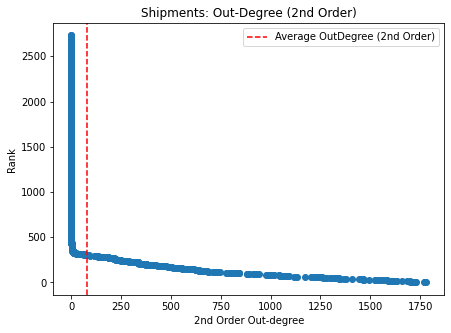

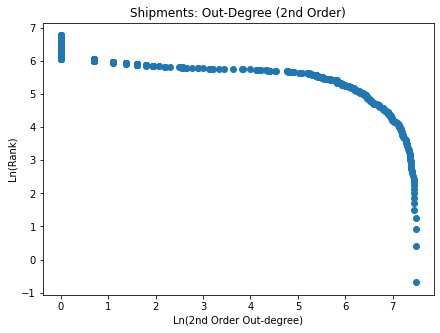

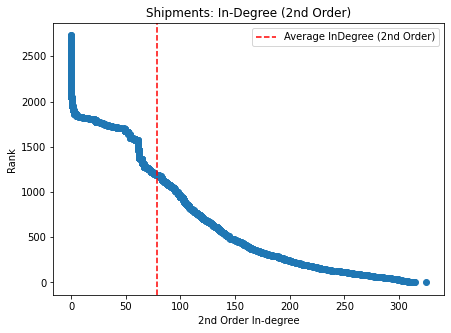

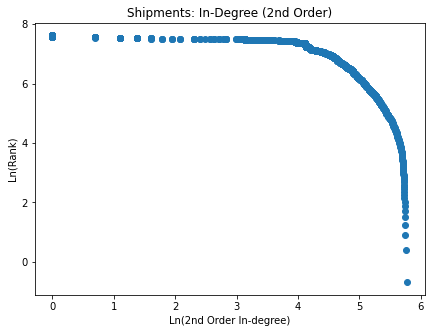

In [58]:
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(out_degree_2nd_df['OutDegree_2'],out_degree_2nd_df['Rank_Out_2'])
plt.axvline(out_degree_2nd.mean(),color='r',linestyle='dashed',label='Average OutDegree (2nd Order)')
plt.ylabel('Rank')
plt.xlabel('2nd Order Out-degree')
plt.title('Shipments: Out-Degree (2nd Order)')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(out_degree_2nd_df['Outdegree_2_ln'],out_degree_2nd_df['Rank_ln'])
plt.ylabel('Ln(Rank)')
plt.xlabel('Ln(2nd Order Out-degree)')
plt.title('Shipments: Out-Degree (2nd Order)')
plt.show()

fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(in_degree_2nd_df['InDegree_2'],in_degree_2nd_df['Rank_In_2'])
plt.axvline(in_degree_2nd.mean(),color='r',linestyle='dashed',label='Average InDegree (2nd Order)')
plt.ylabel('Rank')
plt.xlabel('2nd Order In-degree')
plt.title('Shipments: In-Degree (2nd Order)')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(in_degree_2nd_df['Indegree_2_ln'],out_degree_2nd_df['Rank_ln'])
plt.ylabel('Ln(Rank)')
plt.xlabel('Ln(2nd Order In-degree)')
plt.title('Shipments: In-Degree (2nd Order)')
plt.show()

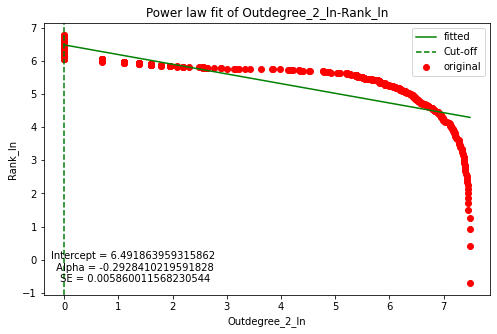

In [59]:
xmin = powerlaw_xmin(out_degree_2nd_df,xcol='Outdegree_2_ln',ycol='Rank_ln',step=0.05)
powerlaw_fit(out_degree_2nd_df,xcol='Outdegree_2_ln',ycol='Rank_ln',x_min=xmin)

In [60]:
in_degree_2nd_df

,Rank_In_2,Location,InDegree_2,Indegree_2_ln,Rank_ln
0,0.5,Kolkata_Dnkuni_L (West Bengal),325,5.783825,-0.693147
1,1.5,Guwahati_Kaikchi_L (Assam),315,5.752573,0.405465
2,2.5,Chennai_Puzhal_L (Tamil Nadu),314,5.749393,0.916291
3,3.5,Bhubaneshwar_Mancheswar_L (Orissa),314,5.749393,1.252763
4,4.5,Delhi_MundkaVillage_L (Delhi),313,5.746203,1.504077
...,...,...,...,...,...
2727,2727.5,Dharmasala_Jaraka2_DPP (Orissa),0,NaN,7.911141
2728,2728.5,Mehsana_DediysnGIDC_I (Gujarat),0,NaN,7.911507
2729,2729.5,Mekhliganj_WardNo7_DPP (West Bengal),0,NaN,7.911874
2730,2730.5,Dharapuram_Selavprabu_DPP (Tamil Nadu),0,NaN,7.912240


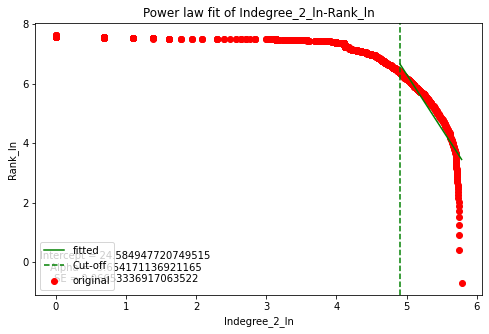

In [61]:
xmin = powerlaw_xmin(in_degree_2nd_df,xcol='Indegree_2_ln',ycol='Rank_ln')
powerlaw_fit(in_degree_2nd_df,xcol='Indegree_2_ln',ycol='Rank_ln',x_min=xmin)